In [1]:
%run imports.ipynb
%run information_conditions.ipynb import Information_Conditions
%run base_ecopg.ipynb import BaseEcologicalPublicGood
%run helper_functions.ipynb import *
%run simulation_and_results_functions.ipynb import *

In [ ]:
'''ecopgg only social'''

ecopg = BaseEcologicalPublicGood()
information_condition_instance = Information_Conditions(ecopg, mode="both_state_and_action_information")

mae_ecopg = POstratAC_eps(env=information_condition_instance, learning_rates=0.05, discount_factors= 0.98)


results_tuple_list = run_simulation_across_conditions(
    mae = mae_ecopg, 
    mode = "both_state_and_action_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

# print([results_tuple_list[i][1] for i in range(len(results_tuple_list))])

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)



(np.float64(0.826),   Classification  MedianTimetoReach  Percentage
0    Cooperation              195.0        85.7
1          Mixed              472.0        14.3)


In [32]:
'''ecopgg only social'''

ecopg = BaseEcologicalPublicGood()
information_condition_instance = Information_Conditions(ecopg, mode="only_action_history_information")
mae_ecopg = POstratAC_eps(env=information_condition_instance, learning_rates=0.05, discount_factors= 0.98)


results_tuple_list = run_simulation_across_conditions(
    mae = mae_ecopg, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

# print([results_tuple_list[i][1] for i in range(len(results_tuple_list))])

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)



(np.float64(0.003),   Classification  MedianTimetoReach  Percentage
0      Defection            11978.5       100.0)


In [14]:
f = ecopg.f[1]
c = ecopg.c[1]

socdi = SocialDilemma(R= f*c - c, T= f*c/2, S= f*c/2 - c, P= 0.0)
memo1pd = HistoryEmbedded(socdi, h = (1, 1, 1))

In [15]:
'''memo1pd where the payoffs are the same as ecopg propso'''
mae_memo1pd = POstratAC_eps(env=memo1pd, learning_rates=0.05, discount_factors= 0.98)


results_tuple_list = run_simulation_across_conditions(
    mae = mae_memo1pd, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)


results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)

'''no coop'''


(np.float64(0.0),   Classification  MedianTimetoReach  Percentage
0      Defection              119.5       100.0)


'no coop'

In [16]:
'''ecopgg no transition to degraded state'''

ecopg_no_transistion_to_degraded_state = BaseEcologicalPublicGood(qc = 0.0)
information_condition_instance = Information_Conditions(ecopg_no_transistion_to_degraded_state, mode="only_action_history_information")
mae_ecopg = POstratAC_eps(env=information_condition_instance, learning_rates=0.05, discount_factors= 0.98)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_ecopg, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)

'''No coop again. (small time difference with memo1pd)'''

(np.float64(0.0),   Classification  MedianTimetoReach  Percentage
0      Defection              121.0       100.0)


'No coop again. (small time difference with memo1pd)'

In [17]:
'''high discount factor, still no coop (for this R,T,S,P  values).
 Whne socdi = SocialDilemma(R=1.0, T= 3, S= -2, P=0.0) 0.99 is enough to acheive coop""
 '''

mae_memo1pd_high_discount_factor = POstratAC_eps(env=memo1pd, learning_rates=0.05, discount_factors= 0.99999)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_memo1pd_high_discount_factor, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)


''''''

(np.float64(0.0),   Classification  MedianTimetoReach  Percentage
0      Defection              120.0       100.0)


''

In [ ]:
'''ecopgg withd degradation and high discount factor'''

ecopg = BaseEcologicalPublicGood()
information_condition_instance = Information_Conditions(ecopg, mode="only_action_history_information")
mae_ecopg_high_discount_factor = POstratAC_eps(env=information_condition_instance, learning_rates=0.05, discount_factors= 1 - 1e-5)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_ecopg_high_discount_factor, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)

'''cooperation acheibed at 1e-5 which is a lower treshold compared to the memo1pd or the ecopg with no transition case'''
'''cares about preventing degradation despite not having infotrmation about the enviornmatalo state'''

(np.float64(0.427),   Classification  MedianTimetoReach  Percentage
0    Cooperation               87.0        10.7
1      Defection               65.0        39.3
2          Mixed              161.5        50.0)


'cares about preventing degradation despite not having infotrmation about the enviornmatalo state'

In [ ]:
'''ecopgg with degradation and high discount factor, but no transition to degraded state'''


ecopg = BaseEcologicalPublicGood(qc = 0.0)
information_condition_instance = Information_Conditions(ecopg, mode="only_action_history_information")
mae_ecopg_high_discount_factor = POstratAC_eps(env=information_condition_instance, learning_rates=0.05, discount_factors= 0.99999)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_ecopg_high_discount_factor, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)

'''no cooperation. no environmantal reciorpcoty'''

(np.float64(0.384),   Classification  MedianTimetoReach  Percentage
0    Cooperation               12.0         7.1
1      Defection                5.5        64.3
2          Mixed                4.5        28.6)


''

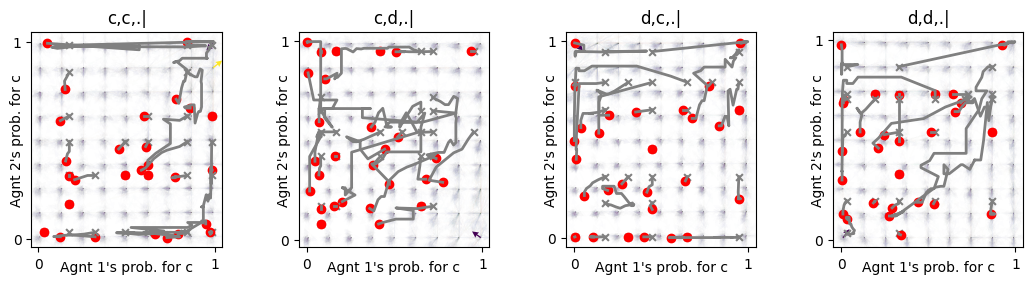

In [37]:
''' a very high discount factor (at least 1 - 1e-8) is needed for acheiving coop""
 '''

mae_memo1pd_high_discount_factor = POstratAC_eps(env=memo1pd, learning_rates=0.05, discount_factors= 1 - 1e-9)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_memo1pd_high_discount_factor, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)

make_plots(memo1pd, mae_memo1pd_high_discount_factor, results_tuple_list)
''''''

In [ ]:
'''When temptation is high and sucker's payoff worse, the discount factor needs to be very high (at least 1 - 10e-9) to acheive coop.'''


f = ecopg.f[1]
c = ecopg.c[1]
r = f*c - c  #1
t = f*c/2    #3
s = f*c/2 - c  #-2
p = 0.0     #0


# socdi_x2 = SocialDilemma(R=1.0, T=1.2, S=-0.5, P=0.0)
socdi_x2 = SocialDilemma(R=1.0, T= 2 , S= -1.5 , P=0.0)

memo1pd_x2 = HistoryEmbedded(socdi_x2, h = (1, 1, 1))

mae_memo1pd_x2_high_discount_factor = POstratAC_eps(env=memo1pd_x2, learning_rates=0.05, discount_factors= 1 - 1e-7)


# Data storage

# print(f"\nMode: {mode}")

results_tuple_list = run_simulation_across_conditions(
    mae = mae_memo1pd_x2_high_discount_factor, 
    mode = "only_action_history_information",
    num_samples = 7, 
    exclude_degraded_state_for_average_cooperation = False
)

results_summary = get_cooperation_time_summary(results_tuple_list)

print(results_summary)




(np.float64(0.036),   Classification  MedianTimetoReach  Percentage
0    Cooperation              102.0         3.6
1      Defection              155.0        96.4)


In [ ]:
'''check the role of game payoff in this effevt'''